# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


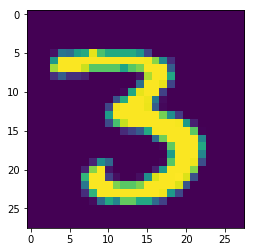

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[12])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [37]:
from keras.layers import Activation, BatchNormalization, Dropout
model = Sequential()

# After 1x1 BN added + mp rm1 
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(8, 1, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(16, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(8, 1, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2))) # mp-rm1

model.add(Convolution2D(16, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(8, 1, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(16, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(8, 1, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
# model.add(MaxPooling2D(pool_size=(2, 2))) # mp-rm2

model.add(Convolution2D(20, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(10, 1))
model.add(BatchNormalization()) # **
model.add(Dropout(0.1))

model.add(Convolution2D(10, 6))
model.add(BatchNormalization()) # *1
# model.add(Dropout(0.1)) # exp dropout
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """


In [34]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_78 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_78 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_53 (Dropout)         (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 26, 26, 8)         136       
_________________________________________________________________
batch_normalization_79 (Batc (None, 26, 26, 8)         32        
_________________________________________________________________
dropout_54 (Dropout)         (None, 26, 26, 8)         0         
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 24, 24, 16)        1168      
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

## All the run's below are to see the affect of BN, DP after certain layer.

### what's the effect of second max pool in model 

In [11]:
# commenting second max pool | mp-rm2
model.fit(X_train, Y_train, batch_size=32, nb_epoch=30, verbose=1, validation_data=(X_test, Y_test))

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 32s 529us/step - loss: 0.4395 - acc: 0.9146 - val_loss: 0.1335 - val_acc: 0.9814
Epoch 2/30
60000/60000 [==============================] - 29s 476us/step - loss: 0.1539 - acc: 0.9693 - val_loss: 0.0581 - val_acc: 0.9884
Epoch 3/30
60000/60000 [==============================] - 28s 471us/step - loss: 0.1027 - acc: 0.9776 - val_loss: 0.0700 - val_acc: 0.9862
Epoch 4/30
60000/60000 [==============================] - 27s 455us/step - loss: 0.0803 - acc: 0.9820 - val_loss: 0.0389 - val_acc: 0.9892
Epoch 5/30
60000/60000 [==============================] - 27s 453us/step - loss: 0.0656 - acc: 0.9840 - val_loss: 0.0376 - val_acc: 0.9904
Epoch 6/30
60000/60000 [==============================] - 28s 470us/step - loss: 0.0563 - acc: 0.9862 - val_loss: 0.0307 - val_acc: 0.9914
Epoch 7/30
60000/60000 [==============================] - 27s 450us/step - loss: 0.0477 - acc: 0.9878 - val_loss: 0.

### what's the effect of adding Drop out after every BN

In [19]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=30, verbose=1, validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 35s 582us/step - loss: 0.5910 - acc: 0.8625 - val_loss: 0.1370 - val_acc: 0.9749
Epoch 2/30
60000/60000 [==============================] - 32s 534us/step - loss: 0.2199 - acc: 0.9491 - val_loss: 0.0619 - val_acc: 0.9857
Epoch 3/30
60000/60000 [==============================] - 31s 519us/step - loss: 0.1550 - acc: 0.9616 - val_loss: 0.0542 - val_acc: 0.9846
Epoch 4/30
60000/60000 [==============================] - 30s 508us/step - loss: 0.1252 - acc: 0.9680 - val_loss: 0.0541 - val_acc: 0.9854
Epoch 5/30
60000/60000 [==============================] - 32s 537us/step - loss: 0.1032 - acc: 0.9731 - val_loss: 0.0425 - val_acc: 0.9881
Epoch 6/30
60000/60000 [==============================] - 30s 505us/step - loss: 0.0945 - acc: 0.9753 - val_loss: 0.0326 - val_acc: 0.9911
Epoch 7/30
60000/60000 [==============================] - 31s 523us/step - loss: 0.0859 - acc: 0.9771 - val_loss: 0.

### Previous fit was DP after every BN but not before flatten, so this run is to check what's the effect of adding Dropout before flatten layer.

In [25]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=30, verbose=1, validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 36s 602us/step - loss: 0.7147 - acc: 0.7904 - val_loss: 0.1467 - val_acc: 0.9730
Epoch 2/30
60000/60000 [==============================] - 32s 531us/step - loss: 0.3994 - acc: 0.8694 - val_loss: 0.1052 - val_acc: 0.9772
Epoch 3/30
60000/60000 [==============================] - 31s 522us/step - loss: 0.3231 - acc: 0.8906 - val_loss: 0.0684 - val_acc: 0.9835
Epoch 4/30
60000/60000 [==============================] - 33s 542us/step - loss: 0.2816 - acc: 0.9043 - val_loss: 0.0600 - val_acc: 0.9842
Epoch 5/30
60000/60000 [==============================] - 33s 548us/step - loss: 0.2549 - acc: 0.9127 - val_loss: 0.0459 - val_acc: 0.9872
Epoch 6/30
60000/60000 [==============================] - 32s 534us/step - loss: 0.2330 - acc: 0.9197 - val_loss: 0.0433 - val_acc: 0.9885
Epoch 7/30
60000/60000 [==============================] - 32s 529us/step - loss: 0.2216 - acc: 0.9244 - val_loss: 0.

### what's the effect of first max pool layer in model

In [34]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=50, verbose=1, validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 63s 1ms/step - loss: 0.3982 - acc: 0.9305 - val_loss: 0.1351 - val_acc: 0.9821
Epoch 2/50
60000/60000 [==============================] - 56s 940us/step - loss: 0.1627 - acc: 0.9677 - val_loss: 0.0730 - val_acc: 0.9851
Epoch 3/50
60000/60000 [==============================] - 57s 943us/step - loss: 0.1128 - acc: 0.9746 - val_loss: 0.0563 - val_acc: 0.9861
Epoch 4/50
60000/60000 [==============================] - 56s 937us/step - loss: 0.0853 - acc: 0.9794 - val_loss: 0.0424 - val_acc: 0.9903
Epoch 5/50
60000/60000 [==============================] - 56s 931us/step - loss: 0.0702 - acc: 0.9830 - val_loss: 0.0384 - val_acc: 0.9903
Epoch 6/50
60000/60000 [==============================] - 57s 944us/step - loss: 0.0613 - acc: 0.9849 - val_loss: 0.0332 - val_acc: 0.9909
Epoch 7/50
60000/60000 [==============================] - 57s 943us/step - loss: 0.0532 - acc: 0.9863 - val_loss: 0.03

### what's the effect of second max pool in model ran for 50 ep

In [15]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=50, verbose=1, validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 30s 502us/step - loss: 0.4477 - acc: 0.9105 - val_loss: 0.1376 - val_acc: 0.9784
Epoch 2/50
60000/60000 [==============================] - 27s 449us/step - loss: 0.1531 - acc: 0.9694 - val_loss: 0.0686 - val_acc: 0.9863
Epoch 3/50
60000/60000 [==============================] - 28s 465us/step - loss: 0.1044 - acc: 0.9771 - val_loss: 0.0490 - val_acc: 0.9890
Epoch 4/50
60000/60000 [==============================] - 29s 483us/step - loss: 0.0782 - acc: 0.9823 - val_loss: 0.0419 - val_acc: 0.9896
Epoch 5/50
60000/60000 [==============================] - 27s 450us/step - loss: 0.0647 - acc: 0.9839 - val_loss: 0.0433 - val_acc: 0.9874
Epoch 6/50
60000/60000 [==============================] - 27s 450us/step - loss: 0.0555 - acc: 0.9861 - val_loss: 0.0354 - val_acc: 0.9890
Epoch 7/50
60000/60000 [==============================] - 28s 471us/step - loss: 0.0479 - acc: 0.9881 - val_loss: 0.

### what's the effect of adding Drop out after every BN for 50 ep -- 25 th ep 0.9946 val acc

In [22]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=50, verbose=1, validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 35s 590us/step - loss: 0.5683 - acc: 0.8706 - val_loss: 0.1472 - val_acc: 0.9710
Epoch 2/50
60000/60000 [==============================] - 31s 519us/step - loss: 0.2134 - acc: 0.9509 - val_loss: 0.0665 - val_acc: 0.9850
Epoch 3/50
60000/60000 [==============================] - 32s 540us/step - loss: 0.1529 - acc: 0.9621 - val_loss: 0.0601 - val_acc: 0.9855
Epoch 4/50
60000/60000 [==============================] - 31s 514us/step - loss: 0.1265 - acc: 0.9680 - val_loss: 0.0431 - val_acc: 0.9884
Epoch 5/50
60000/60000 [==============================] - 31s 516us/step - loss: 0.1091 - acc: 0.9712 - val_loss: 0.0404 - val_acc: 0.9895
Epoch 6/50
60000/60000 [==============================] - 32s 540us/step - loss: 0.0946 - acc: 0.9759 - val_loss: 0.0343 - val_acc: 0.9902
Epoch 7/50
60000/60000 [==============================] - 31s 516us/step - loss: 0.0870 - acc: 0.9766 - val_loss: 0.

### what's the effect of adding Drop out after every BN for BS 64 + 50 ep

In [36]:
model.fit(X_train, Y_train, batch_size=64, nb_epoch=50, verbose=1, validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 22s 373us/step - loss: 0.7009 - acc: 0.8417 - val_loss: 0.2148 - val_acc: 0.9642
Epoch 2/50
60000/60000 [==============================] - 18s 296us/step - loss: 0.2441 - acc: 0.9544 - val_loss: 0.1143 - val_acc: 0.9763
Epoch 3/50
60000/60000 [==============================] - 17s 278us/step - loss: 0.1605 - acc: 0.9662 - val_loss: 0.0806 - val_acc: 0.9796
Epoch 4/50
60000/60000 [==============================] - 17s 276us/step - loss: 0.1224 - acc: 0.9714 - val_loss: 0.0673 - val_acc: 0.9831
Epoch 5/50
60000/60000 [==============================] - 17s 276us/step - loss: 0.1025 - acc: 0.9743 - val_loss: 0.0461 - val_acc: 0.9882
Epoch 6/50
60000/60000 [==============================] - 16s 274us/step - loss: 0.0896 - acc: 0.9772 - val_loss: 0.0400 - val_acc: 0.9880
Epoch 7/50
60000/60000 [==============================] - 18s 295us/step - loss: 0.0820 - acc: 0.9787 - val_loss: 0.

### what's the effect of adding Drop out after every BN + BS 128

In [39]:
model.fit(X_train, Y_train, batch_size=128, nb_epoch=50, verbose=1, validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 16s 273us/step - loss: 0.8918 - acc: 0.7896 - val_loss: 0.2606 - val_acc: 0.9600
Epoch 2/50
60000/60000 [==============================] - 9s 155us/step - loss: 0.3252 - acc: 0.9499 - val_loss: 0.1641 - val_acc: 0.9751
Epoch 3/50
60000/60000 [==============================] - 9s 157us/step - loss: 0.2119 - acc: 0.9642 - val_loss: 0.1057 - val_acc: 0.9805
Epoch 4/50
60000/60000 [==============================] - 9s 156us/step - loss: 0.1579 - acc: 0.9704 - val_loss: 0.0805 - val_acc: 0.9841
Epoch 5/50
60000/60000 [==============================] - 10s 161us/step - loss: 0.1271 - acc: 0.9750 - val_loss: 0.0638 - val_acc: 0.9865
Epoch 6/50
60000/60000 [==============================] - 9s 157us/step - loss: 0.1072 - acc: 0.9773 - val_loss: 0.0539 - val_acc: 0.9879
Epoch 7/50
60000/60000 [==============================] - 10s 162us/step - loss: 0.0925 - acc: 0.9791 - val_loss: 0.0450

### what's the effect of adding Drop out after every BN + DP before flatten

In [28]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=50, verbose=1, validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 37s 617us/step - loss: 0.7426 - acc: 0.7818 - val_loss: 0.1659 - val_acc: 0.9727
Epoch 2/50
60000/60000 [==============================] - 32s 539us/step - loss: 0.4092 - acc: 0.8668 - val_loss: 0.0979 - val_acc: 0.9813
Epoch 3/50
60000/60000 [==============================] - 32s 530us/step - loss: 0.3292 - acc: 0.8902 - val_loss: 0.0716 - val_acc: 0.9845
Epoch 4/50
60000/60000 [==============================] - 34s 565us/step - loss: 0.2925 - acc: 0.8999 - val_loss: 0.0614 - val_acc: 0.9857
Epoch 5/50
60000/60000 [==============================] - 32s 531us/step - loss: 0.2621 - acc: 0.9091 - val_loss: 0.0442 - val_acc: 0.9887
Epoch 6/50
60000/60000 [==============================] - 33s 548us/step - loss: 0.2388 - acc: 0.9167 - val_loss: 0.0580 - val_acc: 0.9839
Epoch 7/50
60000/60000 [==============================] - 32s 534us/step - loss: 0.2242 - acc: 0.9219 - val_loss: 0.

### what's the effect of adding Drop out after every BN for 80 ep aka HomeStretch.

In [31]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=80, verbose=1, validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/80
60000/60000 [==============================] - 38s 628us/step - loss: 0.5788 - acc: 0.8656 - val_loss: 0.1857 - val_acc: 0.9675
Epoch 2/80
60000/60000 [==============================] - 32s 540us/step - loss: 0.2151 - acc: 0.9491 - val_loss: 0.0770 - val_acc: 0.9835
Epoch 3/80
60000/60000 [==============================] - 32s 531us/step - loss: 0.1549 - acc: 0.9621 - val_loss: 0.0629 - val_acc: 0.9841
Epoch 4/80
60000/60000 [==============================] - 33s 549us/step - loss: 0.1248 - acc: 0.9679 - val_loss: 0.0401 - val_acc: 0.9898
Epoch 5/80
60000/60000 [==============================] - 32s 527us/step - loss: 0.1077 - acc: 0.9718 - val_loss: 0.0409 - val_acc: 0.9886
Epoch 6/80
60000/60000 [==============================] - 34s 571us/step - loss: 0.0929 - acc: 0.9751 - val_loss: 0.0354 - val_acc: 0.9899
Epoch 7/80
60000/60000 [==============================] - 32s 529us/step - loss: 0.0867 - acc: 0.9761 - val_loss: 0.

### ---

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.04965896717322466, 0.9861]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[2.0593689e-17 6.3046323e-17 8.9005447e-13 1.8406407e-10 8.0754371e-19
  8.0671096e-15 1.1510667e-24 1.0000000e+00 2.1262439e-10 2.7205176e-11]
 [2.5421015e-15 5.1460576e-12 1.0000000e+00 1.7606363e-12 6.3726551e-23
  3.3248325e-16 4.4326671e-09 1.8222993e-27 1.8873889e-12 3.6800765e-21]
 [3.7568029e-08 9.9987435e-01 6.9531761e-06 6.3134886e-10 9.9738187e-05
  5.2485571e-08 1.0483473e-07 1.0138228e-06 1.7757657e-05 1.9014761e-10]
 [1.0000000e+00 2.2739057e-15 6.6718070e-10 5.6225624e-15 4.5025926e-16
  2.7407175e-13 1.3530634e-09 3.9892802e-13 5.8574483e-14 4.0855683e-12]
 [1.0115652e-12 6.9521903e-14 1.3467061e-13 1.9833676e-13 9.9999976e-01
  4.2785103e-16 1.6022580e-12 5.5436229e-11 6.7551126e-10 2.2112354e-07]
 [2.3979660e-10 9.9982810e-01 3.5553690e-08 3.5910691e-11 1.0332796e-05
  1.4169725e-10 2.0029900e-11 1.5314015e-04 8.3647601e-06 3.8377021e-10]
 [1.4182455e-19 9.8074493e-11 5.7774190e-09 2.3251079e-13 9.9966061e-01
  6.0978769e-09 2.3871165e-16 2.2344653e-09 3.3876873e-04 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

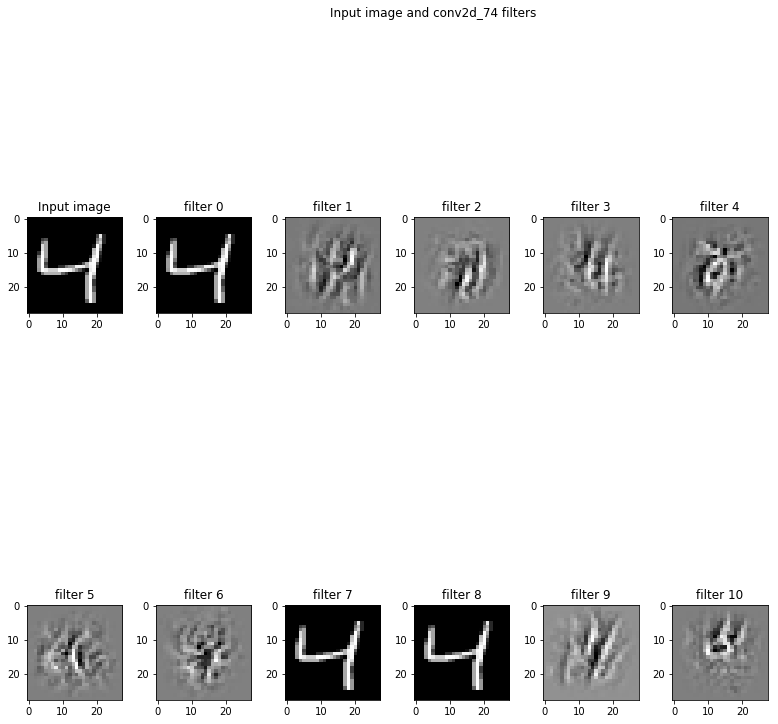

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_74'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

## Results

---

Model -   2 times 16, 3x3 -> BN -> 8, 1x1 -> BN (+) | MP | 2 times 16, 3x3 -> BN -> 8, 1x1 -> BN (+) | MP | 20, 3x3 -> BN -> 10, 1x1 -> 10, 2x2 {added BN after every 1x1}  </br>

BS - 32 </br> 
Epoch - 30 </br>
Parameters - 6624 </br>

Train Acc -  0.9955 </br>
Val Acc - 0.9909 </br>
HIghest Val Acc - 0.9913 in 26th epoc</br>

#### 2nd Run 
BS - 32 </br> 
Epoch - 50 </br>
Parameters - 6624 </br>

Train Acc -  0.9968 </br>
Val Acc - 0.9898 </br>
HIghest Val Acc - 0.9908 in 49th epoc</br>

---

Model 2 -   2 times 16, 3x3 -> BN -> 8, 1x1 -> BN | MP | 2 times 16, 3x3 -> BN -> 8, 1x1 -> BN | MP | 20, 3x3 -> BN -> 10, 1x1 -> BN (+) -> 10, 6x6 {adding BN after last 1x1 conv}  </br>

BS - 32 </br> 
Epoch - 30 </br>
Parameters - 6624 </br>

Train Acc -  0.9956 </br>
Val Acc - 0.9895 </br>
HIghest Val Acc - 0.9916 in 27th epoc</br>


#### 2nd Run 
BS - 32 </br> 
Epoch - 50 </br>
Parameters - 6624 </br>

Train Acc -  0.9972 </br>
Val Acc - 0.9894 </br>
HIghest Val Acc - 0.9904 in 34th epoc</br>

---

Model 2 -   2 times 16, 3x3 -> BN -> 8, 1x1 -> BN | MP | 2 times 16, 3x3 -> BN -> 8, 1x1 -> BN | MP | 20, 3x3 -> BN -> 10, 1x1 -> BN -> 10, 6x6 -> BN (+) -> flatten() {adding BN before flatten}  </br>

BS - 32 </br> 
Epoch - 30 </br>
Parameters - 6624 </br>

Train Acc -  0.9941 </br>
Val Acc - 0.9914 </br>
HIghest Val Acc - <b>0.9929</b> in 21st epoc</br>


#### 2nd Run 
BS - 32 </br> 
Epoch - 50 </br>
Parameters - 6624 </br>

Train Acc -  0.9966 </br>
Val Acc - 0.9922 </br>
HIghest Val Acc - 0.9924 in 34th epoc</br>


#### Obs. 
Adding BN before flatten() layer does help, Highest Vald. Acc - <b> 0.9929 </b> achieved.


#### MP-RM1

Model 2 -   2 times 16, 3x3 -> BN -> 8, 1x1 -> BN | MP (-) | 2 times 16, 3x3 -> BN -> 8, 1x1 -> BN | MP | 20, 3x3 -> BN -> 10, 1x1 -> BN -> 10, 6x6 -> BN -> flatten() </br>

BS - 32 </br> 
Epoch - 30 </br>
Parameters - 6624 </br>

Train Acc -  0.9941 </br>
Val Acc - 0.9914 </br>
HIghest Val Acc - 0.9929 in 21st epoc</br>


#### 2nd Run 
BS - 32 </br> 
Epoch - 50 </br>
Parameters - 12832 </br>

Train Acc -  0.9966 </br>
Val Acc - 0.9922 </br>
HIghest Val Acc - 0.9924 in 34th epoc</br>

#### MP-RM2

Model 2 -   2 times 16, 3x3 -> BN -> 8, 1x1 -> BN | MP | 2 times 16, 3x3 -> BN -> 8, 1x1 -> BN | MP (-) | 20, 3x3 -> BN -> 10, 1x1 -> BN -> 10, 6x6 -> BN -> flatten() </br>

BS - 32 </br> 
Epoch - 30 </br>
Parameters - 10032 </br>

Train Acc -  0.9956 </br>
Val Acc - 0.9923 </br>
HIghest Val Acc - <b>0.9938</b> in 14th epoc</br>


#### 2nd Run 
BS - 32 </br> 
Epoch - 50 </br>
Parameters - 12832 </br>

Train Acc -  0.9966 </br>
Val Acc - 0.9922 </br>
HIghest Val Acc - 0.9924 in 34th epoc</br>


#### Obs. 
Max Pool in the middle of the model helped & Highest Val Acc <b>0.9938</b>

#### Drop out results

Model  -   2 times 16, 3x3 -> BN -> DP (+) -> 8, 1x1 -> BN -> DP (+) | MP | 2 times 16, 3x3 -> BN -> DP (+) -> 8, 1x1 -> BN -> DP (+) | MP (-) | 20, 3x3 -> BN -> DP (+) -> 10, 1x1 -> BN -> DP (+) -> 10, 6x6 -> BN -> flatten() </br>

BS - 32 </br> 
Epoch - 30 </br>
Parameters - 10032 </br>

Train Acc -  0.9870 </br>
Val Acc - 0.9932 </br>
HIghest Val Acc - 0.9940 in 27th epoc</br>


#### 2nd Run 
BS - 32 </br> 
Epoch - 50 </br>
Parameters - 10032 </br>

Train Acc -  0.9889 </br>
Val Acc - 0.9935 </br>
HIghest Val Acc - <b> 0.9946 </b> in 25th epoc</br>

#### 3rd Run BS 2x 
BS - 64 </br> 
Epoch - 50 </br>
Parameters - 10032 </br>

Train Acc -  0.9907 </br>
Val Acc - 0.9946 </br>

#### 4th Run BS 2x 
BS - 128 </br> 
Epoch - 50 </br>
Parameters - 10032 </br>

Train Acc -  0.9910 </br>
Val Acc - 0.9939 </br>
HIghest Val Acc - 0.9940 in 32nd epoc</br>

#### 5th Run 
BS - 32 </br> 
Epoch - 80 </br>
Parameters - 10032 </br>

Train Acc -  0.9893 </br>
Val Acc - 0.9937 </br>
HIghest Val Acc - <b>0.9946</b> in 66th epoc</br>

Model 2 -   2 times 16, 3x3 -> BN -> DP -> 8, 1x1 -> BN -> DP | MP | 2 times 16, 3x3 -> BN -> DP -> 8, 1x1 -> BN -> DP | MP (-) | 20, 3x3 -> BN -> DP -> 10, 1x1 -> BN -> DP  -> 10, 6x6 -> BN -> DP (+) -> flatten() </br>
added dp before flatten.

BS - 32 </br> 
Epoch - 30 </br>
Parameters - 10032 </br>

Train Acc -  0.9410 </br>
Val Acc - 0.9921 </br>
HIghest Val Acc - 0.9928 in 17th epoc</br>


#### 2nd Run 
BS - 32 </br> 
Epoch - 50 </br>
Parameters - 10032 </br>

Train Acc -  0.9424 </br>
Val Acc - 0.9927 </br>
HIghest Val Acc - 0.9937 in 39th epoc</br>

#### Obs. 

Drop after just before flatten doesn't help.


##  Finally after the various trials I conclude

*   BN helps the model
*   Drop Out before flatten doesn't help the model rather it underfit's.

*   Even i ran for more no of epoc it doesn't help.
*   Maxpool in b/w the layer helped but if i tried to use Maxpool at the end doesn't help.


*   when i comment initial MP it adds up to 12832 and when the same does for later MP it adds up to 10032, interestingly with less parameters the model able to reach good accuracy.








